In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:

df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-4.222149,-2.714647,1.305412,0.894480,-1.609008,0
1,-1.053517,-0.560424,-0.942282,4.019465,1.640498,0
2,-0.563258,-0.850505,1.135595,-0.593528,-1.757262,0
3,-3.349941,-2.289138,0.063958,-1.680209,-0.335461,1
4,-2.115047,-4.032999,1.335015,0.766918,1.354812,1


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:


# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)
     

In [12]:
df1 = sample_rows(df,0.1)

In [13]:
df2 = sample_rows(df,0.1)

In [14]:
df3 = sample_rows(df,0.1)

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [22]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [23]:
from sklearn.tree import plot_tree


[Text(0.5, 0.75, 'X[4] <= -0.623\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

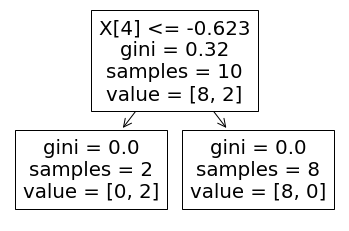

In [24]:
plot_tree(clf1)

[Text(0.5, 0.75, 'X[4] <= -1.167\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

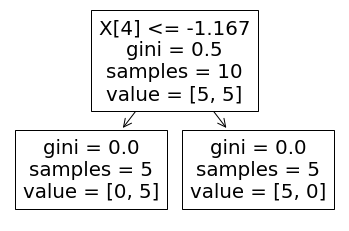

In [25]:
plot_tree(clf2)

[Text(0.6666666666666666, 0.875, 'X[3] <= 0.924\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.5, 0.625, 'X[1] <= -2.347\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.3333333333333333, 0.375, 'X[4] <= 0.905\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

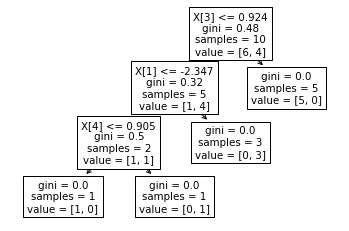

In [26]:
plot_tree(clf3)

In [9]:
import random
df1 = combined_sampling(df,0.5,0.5)

C:\Users\krishnendu\AppData\Local\Temp\ipykernel_17656\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:

df2 = combined_sampling(df,0.5,0.5)

C:\Users\krishnendu\AppData\Local\Temp\ipykernel_17656\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
